# DATA PRESENTATION

The dataset – Diabetes consists of 9 columns, which are – pregnancies, glucose, diastolic, triceps, insulin, bmi, dpf, age and diabetes. The shape of the dataset is (768, 9), which the table consist of 768 rows and 9 columns. In short, we can say that the dataset consists of the details of 768 patients. 

In [ ]:
#Importing the libraries
import pandas as pd 
import numpy as np
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Importing the dataset
diabetes=pd.read_csv('diabetes.csv')
diabetes.head(10)

,gnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# KNOWING THE DATASET

In [ ]:
#Shape of the dataset
diabetes.shape

(768, 9)

In [ ]:
#Identifying the missing values
diabetes.isna().sum()

gnancies     0
glucose      0
diastolic    0
triceps      0
insulin      0
bmi          0
dpf          0
age          0
diabetes     0
dtype: int64

# OUTLIERS

Outliers are one major issue in a dataset, which not treated properly could compromise the quality of our dataset. So, our next task is the identify the outliers. Boxplots are ideal way to understand the presence of outliers in a dataset. So, we have to plot a boxplot for each column in this data set. So, after plotting the boxplot on the column of a dataset, we will get a graph as shown below. 

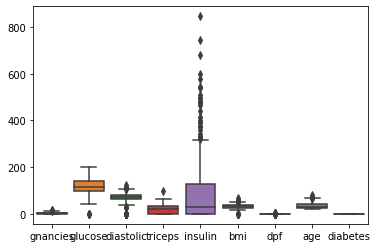

In [ ]:
#Identifying outliers
import seaborn as sns
sns.boxplot(data=diabetes)

In [ ]:
#Replacing the outliers by upperlimit
def Remove_outlier(col):
     Q1,Q3 = np.percentile (col,[25,75])
     IQR = Q3-Q1
     upper_range = Q3+(IQR*1.4)
     lower_range = Q1-(IQR*1.4)
     return upper_range,lower_range
     print("Shape of the Before Outliers:", data.shape)

for i in diabetes [['gnancies','glucose','diastolic','triceps','insulin','bmi','dpf','age']]:
    ur,lr = Remove_outlier(diabetes[i])
    diabetes[i]= np.where(diabetes[i]>ur,ur,diabetes[i])
    diabetes[i]= np.where(diabetes[i]<lr,lr,diabetes[i])
print("Shape of the After OUtliers:", diabetes.shape)

Shape of the After OUtliers: (768, 9)


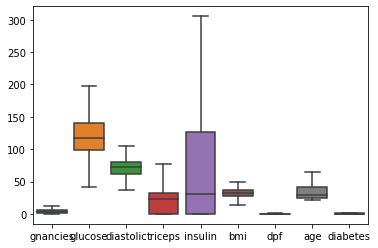

In [ ]:
sns.boxplot(data = diabetes)

# DATA NORMALIZATION

Our next task is to Normalize the data as this would minimize the data redundancy and  standardizes the data, which are the essential qualities that a data should possess in order to produce excellent results. For this purpose, we use Standard Scaler. 

In [ ]:
#Data Normalization
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
data_diab=sc.fit_transform(diabetes)
data_diab

array([[0.46153846, 0.68102073, 0.51461988, ..., 0.50657439, 0.66210046,
        1.        ],
       [0.07692308, 0.27910686, 0.42690058, ..., 0.25190311, 0.2283105 ,
        0.        ],
       [0.61538462, 0.90430622, 0.39766082, ..., 0.54809689, 0.25114155,
        1.        ],
       ...,
       [0.38461538, 0.50877193, 0.51461988, ..., 0.15409458, 0.20547945,
        0.        ],
       [0.07692308, 0.54066986, 0.33918129, ..., 0.25005767, 0.59360731,
        1.        ],
       [0.07692308, 0.33014354, 0.48538012, ..., 0.21868512, 0.0456621 ,
        0.        ]])

# SPLITTING THE DATASET INTO TEST AND TRAIN SET

Next step is to divide the data into a test set and the train set. As the name suggests, the former is used to test the model and the latter for training purpose. In our first method we randomly split the data so that 30 percent of our data will be used as the test set and 70 percent of the data can be used as a train set. And another method is by assigning percentage of test and train set. In this method we assign the first 67% of the dataset as the training set and the remaining 33% as the test set. This step divides the dataset into 514 training set and 254 test set. 

In [ ]:
DIAB=pd.DataFrame(data_diab,columns=diabetes.columns)
DIAB

,gnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,0.461538,0.681021,0.514620,0.455729,0.000000,0.546689,0.506574,0.662100,1.0
1,0.076923,0.279107,0.426901,0.377604,0.000000,0.348613,0.251903,0.228311,0.0
2,0.615385,0.904306,0.397661,0.000000,0.000000,0.255235,0.548097,0.251142,1.0
3,0.076923,0.304625,0.426901,0.299479,0.307793,0.391058,0.082122,0.000000,0.0
4,0.000000,0.610845,0.046784,0.455729,0.550098,0.815507,1.000000,0.273973,1.0
...,...,...,...,...,...,...,...,...,...
763,0.769231,0.381180,0.573099,0.625000,0.589391,0.526882,0.085813,0.958904,0.0
764,0.153846,0.515152,0.485380,0.351562,0.000000,0.637238,0.241753,0.136986,0.0
765,0.384615,0.508772,0.514620,0.299479,0.366732,0.337295,0.154095,0.205479,0.0
766,0.076923,0.540670,0.339181,0.000000,0.000000,0.447651,0.250058,0.593607,1.0


In [ ]:
#Dividing test set and train set
X=DIAB.drop(columns=['diabetes'])
y=DIAB['diabetes']

In [ ]:
# Method 1 - for splitting test set and train set 
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, stratify=y)

In [ ]:
# Method 2 - for splitting test set and train set 
train_size = int(len(data_diab) * 0.67)
test_size = len(data_diab) - train_size
train, test = data_diab[0:train_size,:], data_diab[train_size:len(data_diab),:]
print(len(train), len(test))

514 254


# KNN CLASSIFIER

The K Nearest Neighbour (KNN) is a Supervised Machine learning technique. It chooses a single data point and identifies the ‘K’ number of nearest neighbours and predict the results using the test and train set. We use the following code to create a KNN classifier. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_train, y_train)

0.819366852886406

In [ ]:
knn.score(X_test,y_test)

0.7359307359307359

The score of training set that we get from this model is 82% (approx.) and the score of test set is 73%(approx.)

# LOGISTIC REGRESSION

Logistic regression is a type of Classification algorithm that classifies the dataset into classes based on certain parameters

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
lr.score(X_train, y_train)

0.7690875232774674

In [ ]:
lr.score(X_test, y_test)

0.7748917748917749

The score generated by the logistic regression for the training set is 77 %(approx.) and the test set is 78% (approx.) 

# RANDOM FOREST CLASSIFIER 

In Random Forest classifier we use the number of estimators as 100 (n_estimators = 100). This is a random value that we assign initially. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

The score for train set is 100%(approx.)  and test set is 80%(approx.) by using random forest model. 

In [ ]:
rf.score(X_train, y_train)

1.0

In [ ]:
rf.score(X_test, y_test)

0.7965367965367965

# SUPPORT VECTOR MACHINE

SVM or Support Vector Machine is a type of deep learning algorithm that performs supervised learning technique to analyse the data for classification and regression. 

In [ ]:
from sklearn.svm import SVC
svm=SVC(probability=True)
svm.fit(X_train,y_train)

SVC(probability=True)

The score for train set is 82% and that of test set is 79% using an SVM model. 

In [ ]:
svm.score(X_train, y_train)

0.8175046554934823

In [ ]:
svm.score(X_test, y_test)

0.7878787878787878

# VOTING ENSEMBLE

Ensemble learning technique utilises multiple machine learning algorithms to predict excellent results on a particular dataset. It assesses the strengths and weaknesses of each machine learning algorithms and predicts a result accordingly. In this method we put the above 4 machine learning algorithms namely – K Nearest Neighbours, Logistic Regression, Random Forest Classifier and Support Vector Machine into an ensemble algorithm to get better predictions. 

In [ ]:
#test the three models with the test data and print their accuracy 
print('knn: {}'.format(knn.score(X_test, y_test)))
print('rf: {}'.format(rf.score(X_test, y_test)))
print('log_reg: {}'.format(lr.score(X_test, y_test)))
print('svm: {}'.format(svm.score(X_test, y_test)))

knn: 0.7359307359307359
rf: 0.7965367965367965
log_reg: 0.7748917748917749
svm: 0.7878787878787878


In [ ]:
from sklearn.ensemble import VotingClassifier
estimator=[('knn',knn),('rf',rf),('lr',lr),('svm',svm)]
ensemble_1=VotingClassifier(estimator,voting='soft')

In [ ]:
ensemble_1.fit(X_train,y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('lr', LogisticRegression()),
                             ('svm', SVC(probability=True))],
                 voting='soft')

In [ ]:
ensemble_1.score(X_test,y_test)

0.8008658008658008

In [ ]:
y_pred_ensemble_1 =ensemble_1.predict(X_test)
y_pred_ensemble_1

array([0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0.

# ACCURACY & CONFUSION MATRIX

After fitting the model in a Voting ensemble, we will get a score of 80%(approx.)

In [ ]:
from sklearn.metrics import accuracy_score
ensemble_score = accuracy_score(y_test, y_pred_ensemble_1)
print("Accuracy score (ensemble): ", ensemble_score)

Accuracy score (ensemble):  0.8008658008658008


In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix_1 = confusion_matrix(y_test,y_pred_ensemble_1)
cnf_matrix_1

array([[137,  13],
       [ 33,  48]])

Text(0.5, 257.44, 'Actual label')

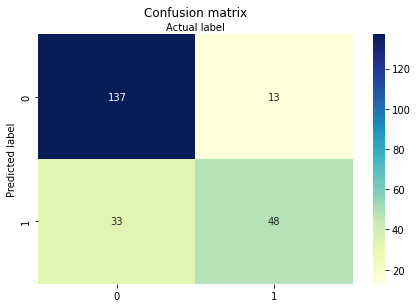

In [ ]:
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Predicted label')
plt.xlabel('Actual label') 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_ensemble_1)) 

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86       150
         1.0       0.79      0.59      0.68        81

    accuracy                           0.80       231
   macro avg       0.80      0.75      0.77       231
weighted avg       0.80      0.80      0.79       231



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


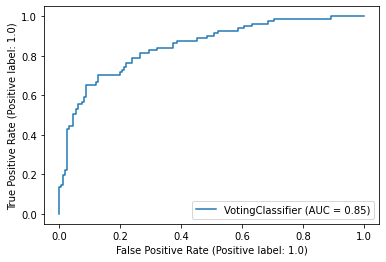

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(ensemble_1, X_test, y_test)

# TUNING PARAMETERS

Tuning Parameters can help in finding optimal parameters that would help in boosting the efficiency of the model. So that we could replace the initially substituted illogical parameters to optimal values that would help to increase the accuracy of the model. For this purpose, we use GridSearch. Grid search runs the model in a pre- specified range of parameters and choose the optimal parameter. 

# TUNING PARAMETERS- KNN

In [180]:
from sklearn.model_selection import GridSearchCV
params_knn = {'n_neighbors': np.arange(1, 25)}#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)#fit model to training data
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [181]:
#save the best model
knn_best = knn_gs.best_estimator_
#check best n_neigbors value
print(knn_gs.best_params_)

{'n_neighbors': 21}


# TUNING PARAMETERS - RANDOM FOREST

In [ ]:
params_rf = {'n_estimators': [50, 100, 200]}
#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)#fit model to training data
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200]})

In [ ]:
#save the best model
rf_best = rf_gs.best_estimator_
#check best n_estimators value
print(rf_gs.best_params_)

{'n_estimators': 100}


# TUNING PARAMETERS - SUPPORT VECTOR MACHINE

In [ ]:
param_svm = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}
svm_gs = GridSearchCV(svm, param_svm,cv=5)
svm_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]})

In [ ]:
svm_best = svm_gs.best_estimator_
#check best n_estimators value
print(svm_gs.best_params_)

{'C': 100, 'gamma': 0.01}


# TUNING PARAMETERS - LOGISTIC REGRESSION

In [ ]:
c_space = np.logspace(-5, 8, 15)
param_lr= {'C': c_space}
# Instantiate the GridSearchCV object: logreg_cv
log_reg = GridSearchCV(lr, param_lr, cv=5)
log_reg.fit(X_train,y_train)

In [182]:
lr_best=lr_gs.best_estimator_
#check best n_estimators value
print(lr_gs.best_params_)

{'C': 3.727593720314938}


In [183]:
print('knn_: {}'.format(knn_best.score(X_test, y_test)))
print('rf_: {}'.format(rf_best.score(X_test, y_test)))
print('svm_: {}'.format(svm_best.score(X_test, y_test)))
print('lr_reg: {}'.format(log_reg.score(X_test, y_test)))

knn_: 0.7662337662337663
rf_: 0.7965367965367965
svm_: 0.7878787878787878
lr_reg: 0.7922077922077922


In [185]:
from sklearn.ensemble import VotingClassifier
estimator=[('knn_',knn_best),('rf_',rf_best),('lr_',log_reg),('svm_',svm_best)]
ensemble=VotingClassifier(estimator,voting='soft')

In [186]:
ensemble.fit(X_train,y_train)

VotingClassifier(estimators=[('knn_', KNeighborsClassifier(n_neighbors=21)),
                             ('rf_', RandomForestClassifier()),
                             ('lr_',
                              GridSearchCV(cv=5, estimator=LogisticRegression(),
                                           param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})),
                             ('svm_',
                              SVC(C=100, gamma=0.01, probability=True))],
                 voting='soft')

# ACCURACY SCORE

Accuracy score is a parameter that is used to measure the performance of a machine Learning Algorithm. It is the ratio of the number of correct predictions to the total number of predictions. As the name descries it measures the accuracy of the predictions made by the machine learning
algorithm. The Accuracy score of voting ensemble before tuning was 80% and after tuning was 78% 

In [187]:
ensemble.score(X_test,y_test)

0.7835497835497836

In [188]:
y_pred_ensemble =ensemble.predict(X_test)
y_pred_ensemble

array([0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0.

In [189]:
from sklearn.metrics import accuracy_score
ensemble_score = accuracy_score(y_test, y_pred_ensemble)
print("Accuracy score (ensemble): ", ensemble_score)

Accuracy score (ensemble):  0.7835497835497836


# CONFUSION MATRIX

A confusion matrix is a two-dimensional table that is used to analyse the performance of a machine learning algorithm. It helps in displaying the labelled and unlabelled instances of a classifier. Each column in a Confusion matrix signifies a specific value.

In [190]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_pred_ensemble)
cnf_matrix

array([[137,  13],
       [ 37,  44]])

Text(0.5, 257.44, 'Actual label')

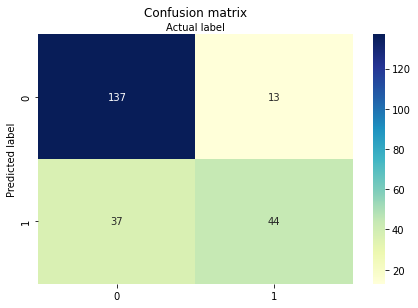

In [191]:
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Predicted label')
plt.xlabel('Actual label') 

# CLASSIFICATION REPORT

In [192]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_ensemble)) 

              precision    recall  f1-score   support

         0.0       0.79      0.91      0.85       150
         1.0       0.77      0.54      0.64        81

    accuracy                           0.78       231
   macro avg       0.78      0.73      0.74       231
weighted avg       0.78      0.78      0.77       231



# ROC AND AUROC

The ROC curve or Receiver Operating Characteristic (ROC) curve is a visual display device that is used to exhibit the performance of our trained model. It plots the true positive rate in the Y axis and False Positive Rate along the X axis. A good ROC curve that signifies accurately trained model should be above the diagonal drawn from the origin.  

The Area Under Receiver Operating Characteristic (AUROC) or simply Area Under 
Curve (AUC) is another performance matrix used to indicate the algorithm efficiency. As the name specifies it represents the area under the ROC curve. An excellent AYC value is 1 and a random classifier posses a score of 0.5 
For the Voting ensemble that we have build after tuning each model  produce an AUC value of 0.85. 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


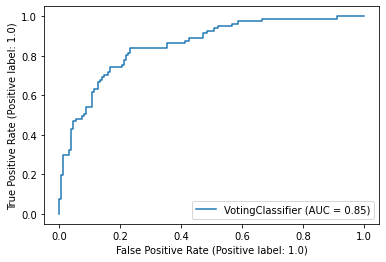

In [193]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(ensemble, X_test, y_test)